# Visualizing Decision Trees

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
import pydotplus

Read our preprocessed data from our last lesson, in the `titanic` data folder.

In [2]:
df_train = pd.read_csv('titanic/train_preprocessed.csv')

Let's take a look at some samples of the data.  We notice that there are some categorical features `Sex` and `Embarked`.

In [3]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


We will use a `LabelEncoder` to encode the categorical columns and replace the original columns in the dataframe.  Typically we would use one hot or dummy encoding instead for Scikit-learn, but we are more interested in the explainability than strict accuracy of the model.

In [4]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Embarked', 'Sex']

cat_features = df_train[cat_cols].apply(LabelEncoder().fit_transform)

for col in cat_cols:
    df_train.drop(col, axis=1, inplace=True)

df_train = pd.concat([df_train, cat_features], axis=1)

Let's make sure we have converted the categorical features to numerical values.

In [5]:
df_train.head()

,Survived,Pclass,Age,Fare,TravelAlone,Embarked,Sex
0,0,3,22.0,7.2500,0,2,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,1,2,0
3,1,1,35.0,53.1000,0,2,0
4,0,3,35.0,8.0500,1,2,1


Split out the features and targets.  The target column is `Survived`.

In [6]:
feature_names=["Age","Fare","TravelAlone","Pclass","Embarked","Sex"] 
X = df_train[feature_names]
y = df_train["Survived"]

Here we create a Decision Tree classifier and fit the model to the training data.

In [7]:
clf = DecisionTreeClassifier(random_state=3, max_depth=3)
model = clf.fit(X, y)

## Visualization with Graphviz
Here we are ready to visualize our classifier with Graphviz.  First we use the `export_graphviz` method to export
our classifier out to a graphviz compatible format.  Then we use the `pydotplus` package to actually graph the trained
model from the dot data format which `export_graphviz` exports to.  Finally, we can view the model using an `Image` instance.

Note that we set some visual characteristics:

* `rotate=True` creates a horizontal graph which is easier to view vertically.  The default is vertical which is spread out horizontally.
* `label='root'` sets labels only on the root node (makes the other nodes a bit more compact visually).
* `filled=True` fills the nodes with appropriate colors (blue=Survived, brown=Not Survived).
* `proportion=True` sets sample values to be percentages and values to be proportions.
* `rounded=True` rounds the boxes for each node.

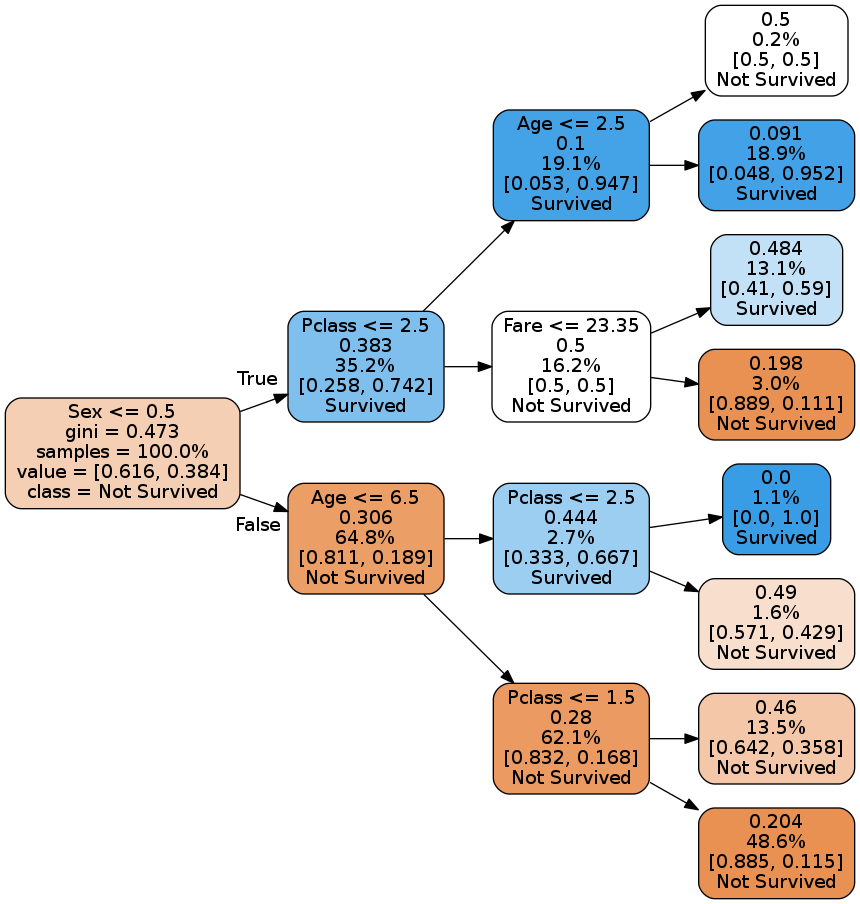

In [8]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=["Not Survived", "Survived"],
                                rotate=True, label='root', filled=True, 
                                proportion=True, rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

When we are done, we can write out a PNG file.

In [9]:
graph.write_png("titanic.png")

True

## Let's Try It Ourselves
We can use the `iris` dataset which is built into sklearn.  You can import the dataset directly as follows.

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

One more thing to keep in mind is that the dataset is already separated into data and target values, so you would use `iris.data` as the training values, and `iris.target` as the target values.  The feature and class names for rendering are also nicely provided as `iris.feature_names` and `iris.graph_names`.

In [11]:
clf = DecisionTreeClassifier(random_state=3, max_depth=3)
model = clf.fit(iris.data, iris.target)

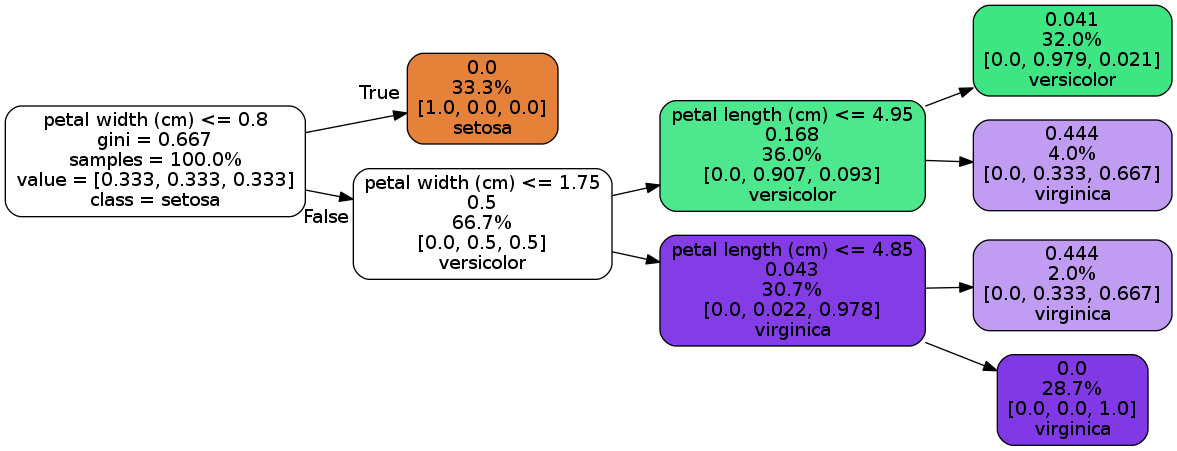

In [12]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                rotate=True, label='root', filled=True, 
                                proportion=True, rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())